## Crop Recommendation 
Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

#### Context
This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

#### Data fields
1) N - ratio of Nitrogen content in soil
2) P - ratio of Phosphorous content in soil
3) K - ratio of Potassium content in soil
4) temperature - temperature in degree Celsius
5) humidity - relative humidity in %
6) ph - ph value of the soil
7) rainfall - rainfall in mm

In [35]:
# importing required pacakges 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle 
import warnings 
warnings.filterwarnings("ignore")

In [44]:
# loading data 
data=pd.read_csv("Crop_recommendation.csv")

In [37]:
# first five rows of data set 
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [38]:
# Total records and features in dataset 
print("Total records in dataset:",data.shape[0])
print("Total features in dataset:",data.shape[1])

Total records in dataset: 2200
Total features in dataset: 8


In [39]:
# dataset information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [40]:
# data statistics 
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [41]:
# checking null values in dataset 
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [42]:
# unique values in dataset features 
unique_values={col:data[col].unique() for col in data.columns}
unique_values

{'N': array([ 90,  85,  60,  74,  78,  69,  94,  89,  68,  91,  93,  77,  88,
         76,  67,  83,  98,  66,  97,  84,  73,  92,  95,  99,  63,  62,
         64,  82,  79,  65,  75,  71,  72,  70,  86,  61,  81,  80, 100,
         87,  96,  40,  23,  39,  22,  36,  32,  58,  59,  42,  28,  43,
         27,  50,  25,  31,  26,  54,  57,  49,  46,  38,  35,  52,  44,
         24,  29,  20,  56,  37,  51,  41,  34,  30,  33,  47,  53,  45,
         48,  13,   2,  17,  12,   6,  10,  19,  11,  18,  21,  16,   9,
          1,   7,   8,   0,   3,   4,   5,  14,  15,  55, 105, 108, 118,
        101, 106, 109, 117, 114, 110, 112, 111, 102, 116, 119, 107, 104,
        103, 120, 113, 115, 133, 136, 126, 121, 129, 122, 140, 131, 135,
        123, 125, 139, 132, 127, 130, 134], dtype=int64),
 'P': array([ 42,  58,  55,  35,  37,  53,  54,  46,  56,  50,  48,  38,  45,
         40,  59,  41,  47,  49,  51,  57,  39,  43,  44,  60,  52,  36,
         72,  67,  73,  70,  62,  74,  66,  63,  71,  78

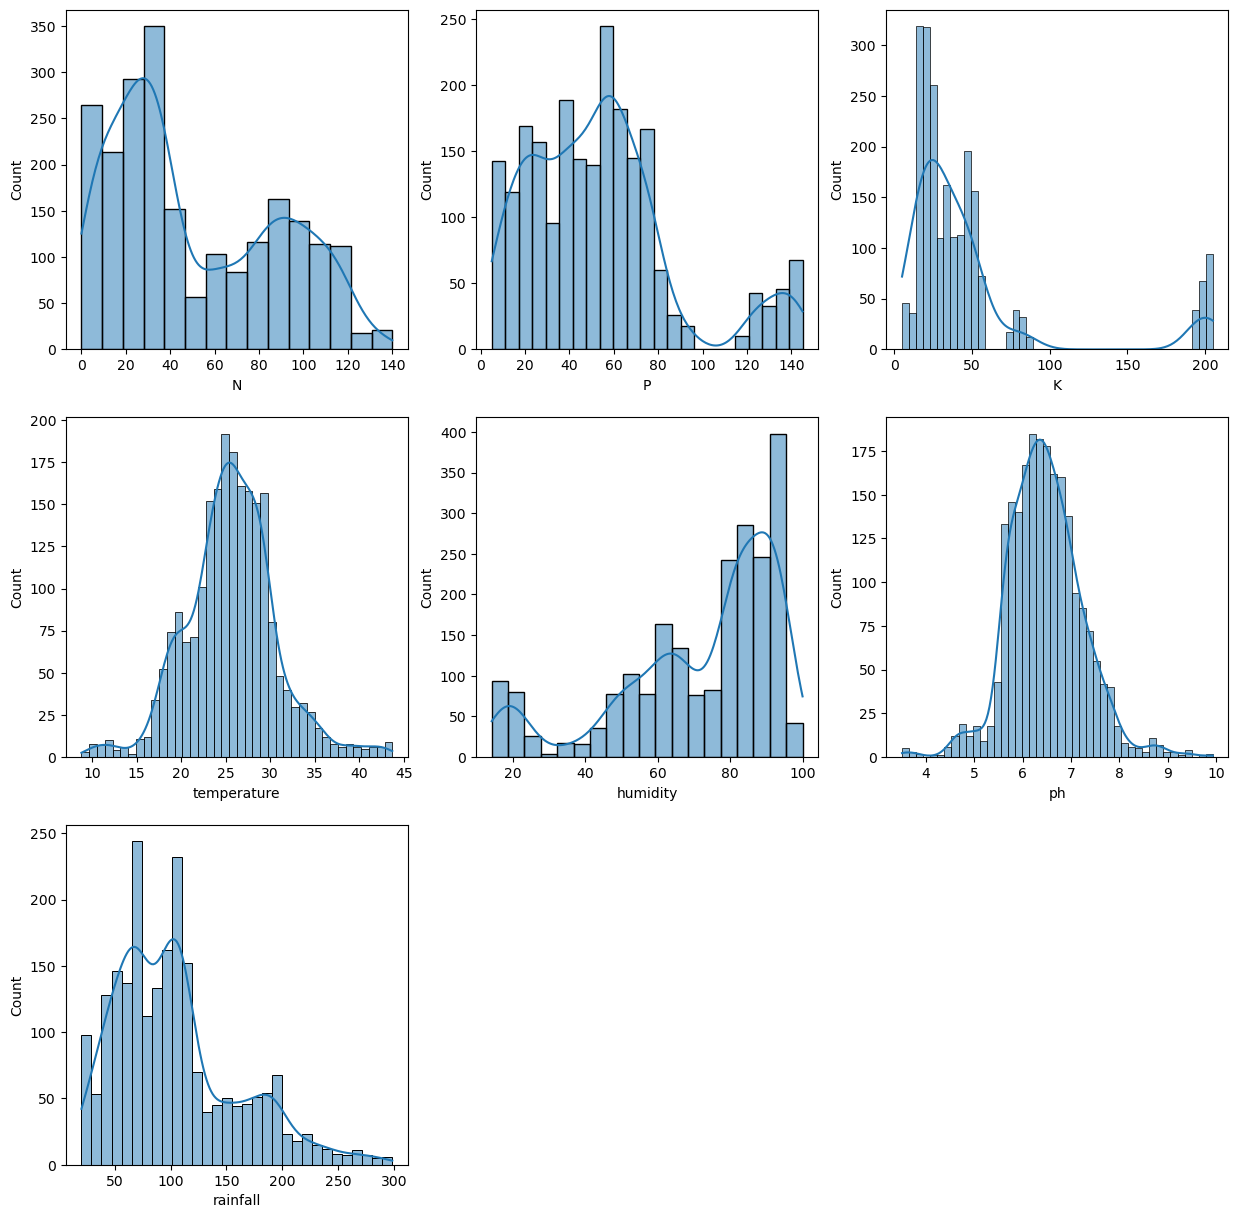

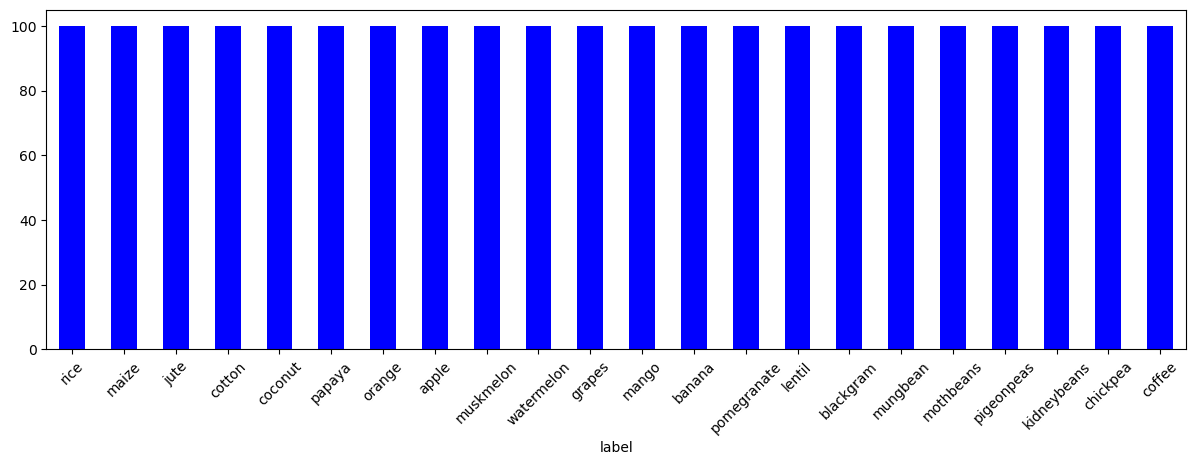

In [43]:
# plotting data distribution 
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.histplot(data["N"],kde=True)
plt.subplot(3,3,2)
sns.histplot(data["P"],kde=True)
plt.subplot(3,3,3)
sns.histplot(data["K"],kde=True)
plt.subplot(3,3,4)
sns.histplot(data["temperature"],kde=True)
plt.subplot(3,3,5)
sns.histplot(data["humidity"],kde=True)
plt.subplot(3,3,6)
sns.histplot(data["ph"],kde=True)
plt.subplot(3,3,7)
sns.histplot(data["rainfall"],kde=True)
plt.figure(figsize=(50,15))
plt.subplot(3,3,8)
data["label"].value_counts().plot(kind="bar",color="blue",width=0.5)
plt.xticks(rotation=45)
plt.show()

In [10]:
# checking balanced in dataset 
data["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [11]:
# encoding categorical data 
from sklearn.preprocessing import LabelEncoder 
encoder=LabelEncoder()
data["label"]=encoder.fit_transform(data["label"])

data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


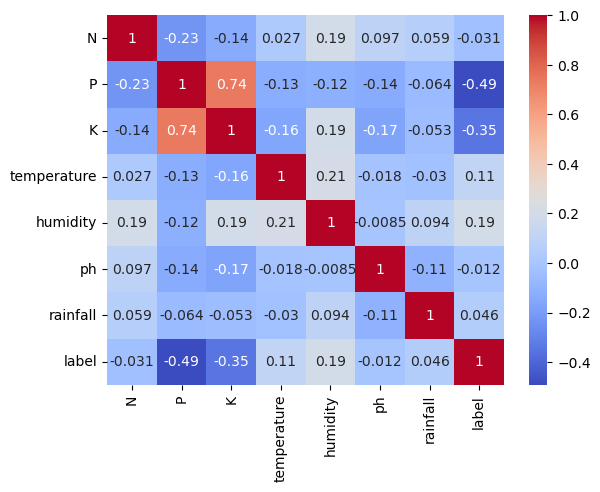

In [12]:
# checking correlation 
corr=data.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [13]:
# divideing data into input and target features 
x=data.iloc[:,:7]
y=data.iloc[:,7:]

In [14]:
# input features first five rows
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [15]:
# target feature first five rows
y.head()

,label
0,20
1,20
2,20
3,20
4,20


In [16]:
# splitting data into train and test
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
print("train input data:",train_x.shape)
print("train target data:",train_y.shape)
print("test input data:",test_x.shape)
print("test target data:",test_y.shape)

train input data: (1760, 7)
train target data: (1760, 1)
test input data: (440, 7)
test target data: (440, 1)


In [18]:
# scaling data by using StandardScaler
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler() 

scale.fit(train_x)
train_x_scale=scale.transform(train_x)
test_x_scale=scale.transform(test_x)

## ANN MODEL

In [19]:
# importing tensorflow and required pacakges
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
# creating model
model=Sequential([
    Dense(32,activation="relu",input_shape=(train_x_scale.shape[1],)),
    Dense(16,activation="relu"), 
    Dense(22,activation="softmax")
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 22)             │           374 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# defining optimizers and loss function 
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
loss=tf.keras.losses.SparseCategoricalCrossentropy()

In [22]:
# model compliation
model.compile(optimizer=opt,loss=loss,metrics=["accuracy"])

In [23]:
# defining earlystopping
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [24]:
# model training
history=model.fit(train_x_scale,train_y,validation_split=0.1,epochs=100,callbacks=[early_stopping])

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2624 - loss: 2.5122 - val_accuracy: 0.7614 - val_loss: 0.7792
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8534 - loss: 0.5208 - val_accuracy: 0.8750 - val_loss: 0.2865
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9124 - loss: 0.2399 - val_accuracy: 0.9375 - val_loss: 0.2191
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9417 - loss: 0.1570 - val_accuracy: 0.9375 - val_loss: 0.1701
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9543 - loss: 0.1195 - val_accuracy: 0.9545 - val_loss: 0.1146
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9747 - loss: 0.0803 - val_accuracy: 0.9773 - val_loss: 0.0770
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9767 - loss: 0.0647 - val_accuracy: 0.9716 - val_loss: 0.0788
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9737 - loss: 0.0767 - val_accuracy: 0.9318 - v

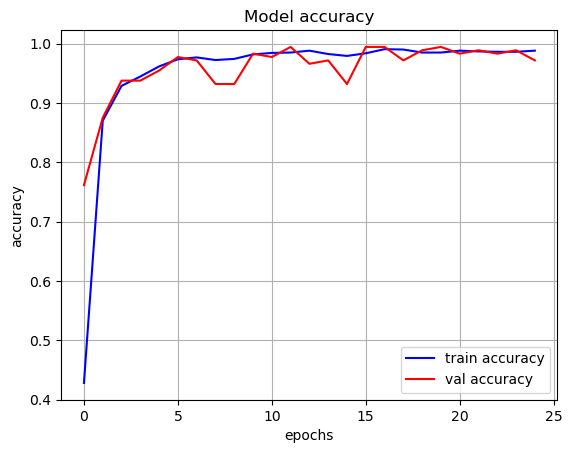

In [25]:
# plotting accuracy 
plt.plot(history.history["accuracy"],label="train accuracy",color="blue")
plt.plot(history.history["val_accuracy"],label="val accuracy",color="red")
plt.title("Model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()
plt.legend()
plt.show()

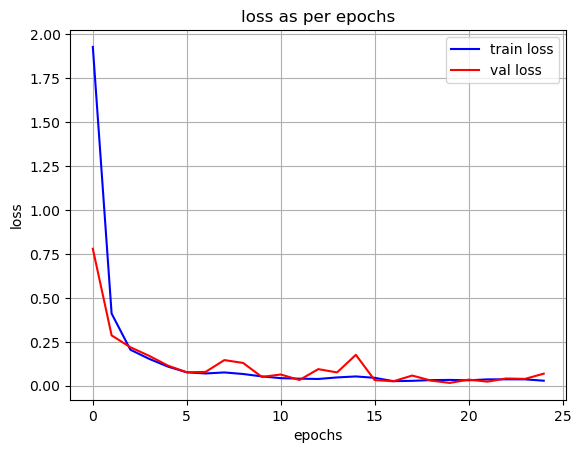

In [26]:
# plotting loss
plt.plot(history.history["loss"],label="train loss",color="blue")
plt.plot(history.history["val_loss"],label="val loss",color="red")
plt.title("loss as per epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
plt.legend()
plt.show()

In [27]:
# accuracy on test
loss,accuracy=model.evaluate(test_x_scale,test_y)
print(accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9849 - loss: 0.0576 
0.9818181991577148


In [29]:
# saving models
with open("encoder.pkl","wb")as file: 
    pickle.dump(encoder,file)

with open("scaler.pkl","wb")as file: 
    pickle.dump(scale,file)

model.save("model.h5")